# **Analysis for multiple trials**

load modules

In [1]:
%load_ext autoreload

%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from spikeA.Session import *
from spikeA.Spike_train_loader import Spike_train_loader
from spikeA.Cell_group import Cell_group
from spikeA.Animal_pose import Animal_pose
from spikeA.Session import Session

set session name

In [2]:
#name="pk1330-08112021-0101"
#name="pk1330-10112021-0101"
#name="pk1330-16112021-0101"

#name="pk1330-12112021-0101"
#name="pk1331-23112021-0101"
#name="pk1331-23112021-0101_B"

#name="pk1331-24112021-0101"
#name="pk1347-24112021-0101"

#name="pk1331-29112021-0101"
#name="pk1347-01122021-0101"

#name="pk1658-06122021-0102"

#name="pk1331-29112021-0101" # HD cells
#name="pk1658-10122021-0101"

#name="pk1613-12012022-0101"
#name="pk1613-13012022-0101"

#name="pk1615-14012022-0101"

#name="pk1615-15012022-0101"
#name="pk1615-16012022-0101"
#name="pk1615-17012022-0101"
#name="pk1615-18012022-0101_A"

#name="pk1615-18012022-0103"
#name="pk1615-19012022-0105" ## remapping ! (black-white-black)
#name="pk1615-19012022-0102"

#name="pk1615-20012022-0101_B"
#name="pk3865-20012022-0101_B"

#name="pk3865-21012022-0101"

#name="pk1615-21012022-0109"  # five different environments in two different rooms
#name="pk3865-24012022-0109"  # five different environments in two different rooms
#name="pk3865-25012022-0105" # black-white-black in 55b
#name="pk3865-26012022-0101"
name="pk3865-27012022-0109" # five env + good coverage, good MEC signal, ADN?
#name="pk3864-28012022-0101" # first trial with pk3864
#name="pk3864-29012022-0101" # 
#name="pk3864-30012022-0101" # 

Check the path

In [3]:
import os

basedir = "/adata/electro"
subject, session = name.split("-",1)
path = basedir+"/"+subject+"/"+name+"/"

fname = name.split("_")[0]

print("Path:", path)
print("Mouse:", subject) # directory = mouse subject name
print("Session:", session)
print("Name:", name, ",", fname)
print("")
print("Path:", "OK" if os.path.isdir(path) else "invalid")

Path: /adata/electro/pk3865/pk3865-27012022-0109/
Mouse: pk3865
Session: 27012022-0109
Name: pk3865-27012022-0109 , pk3865-27012022-0109

Path: OK


## Get a Session object

Check the files

In [4]:
ses = Kilosort_session(name=fname, path=path)
ses.load_parameters_from_files()
print(ses)

<class 'spikeA.Session.Kilosort_session'>
name = pk3865-27012022-0109
path = /adata/electro/pk3865/pk3865-27012022-0109
subject = pk3865
session_dat_time = 2022-01-27 01:09:00
fileBase = /adata/electro/pk3865/pk3865-27012022-0109/pk3865-27012022-0109
file_names = {'par': '/adata/electro/pk3865/pk3865-27012022-0109/pk3865-27012022-0109.par', 'desen': '/adata/electro/pk3865/pk3865-27012022-0109/pk3865-27012022-0109.desen', 'desel': '/adata/electro/pk3865/pk3865-27012022-0109/pk3865-27012022-0109.desel', 'sampling_rate': '/adata/electro/pk3865/pk3865-27012022-0109/pk3865-27012022-0109.sampling_rate_dat', 'stimulation': '/adata/electro/pk3865/pk3865-27012022-0109/pk3865-27012022-0109.stimulation', 'px_per_cm': '/adata/electro/pk3865/pk3865-27012022-0109/pk3865-27012022-0109.px_per_cm', 'setup': '/adata/electro/pk3865/pk3865-27012022-0109/pk3865-27012022-0109.setup', 'environmentFamiliarity': '/adata/electro/pk3865/pk3865-27012022-0109/pk3865-27012022-0109.environmentFamiliarity', 'params':

In [5]:
print("all trials:\n")

for t,(tn,su,en,en_details,ef,iv) in enumerate(ses.session_trials()):
    print("#",t+1)
    print("trial:",tn)
    print("setup:",su)
    print("environment:",en)
    
    shape,diam,color,cue=en_details

    print("- Box type:",shape)
    print("- diameter:",diam)
    print("- color:",color)
    print("- cue:",cue)
    
    print("familiarity:",ef)
    print("duration:",iv[1]-iv[0])
    print("")

all trials:

# 1
trial: pk3865-27012022_01
setup: 28B
environment: sqr-70_black_cue-W
- Box type: square
- diameter: 70.0
- color: black
- cue: cue-W
familiarity: fam
duration: 1305.50395

# 2
trial: pk3865-27012022_02
setup: 28B
environment: rb
- Box type: rb
- diameter: 25.0
- color: None
- cue: None
familiarity: rb
duration: 299.9999500000001

# 3
trial: pk3865-27012022_03
setup: 28B
environment: sqr-70_white_cue-N
- Box type: square
- diameter: 70.0
- color: white
- cue: cue-N
familiarity: novel
duration: 1655.81995

# 4
trial: pk3865-27012022_04
setup: 28B
environment: rb
- Box type: rb
- diameter: 25.0
- color: None
- cue: None
familiarity: rb
duration: 758.8079499999999

# 5
trial: pk3865-27012022_05
setup: 55B
environment: sqr-70_black_cue-E
- Box type: square
- diameter: 70.0
- color: black
- cue: cue-E
familiarity: novel
duration: 1496.6279499999996

# 6
trial: pk3865-27012022_06
setup: 55B
environment: rb
- Box type: rb
- diameter: 25.0
- color: None
- cue: None
familiarity:

## Load spikes

In [6]:
stl = Spike_train_loader()
stl.load_spike_train_kilosort(ses)
print("stl.clu_ids",stl.clu_ids)
cg = Cell_group(stl)

stl.clu_ids [  1   5   7   9  11  12  13  14  15  16  17  18  19  21  22  23  24  25
  33  37  43  60  61  62  63  64  65  66  67  68  69  70  72  73  74  75
  77  78  80  81  86  87  88  90  91  92  93  96 114 120 124 125]


In [7]:
# from tabulate import tabulate

print("Found", len(cg.neuron_list), "good clusters (neurons)")

# for i,(clu_id, spike_time) in enumerate(zip(stl.clu_ids, stl.spike_times)):
#     print("#",i,", id =",clu_id, ", spikes:",len(spike_time))
for i,n in enumerate(cg.neuron_list):
    #  n_spikes = len(n.spike_train.st)
    print("#",i,", id =",n.name, ", spikes:",n.spike_train.n_spikes(),", mean firing rate =",n.spike_train.mean_firing_rate())

Found 52 good clusters (neurons)
# 0 , id = 1 , spikes: 61344 , mean firing rate = 6.866990763615329
# 1 , id = 5 , spikes: 75048 , mean firing rate = 8.401812307456018
# 2 , id = 7 , spikes: 28507 , mean firing rate = 3.9000837853794303
# 3 , id = 9 , spikes: 83816 , mean firing rate = 9.38249012929094
# 4 , id = 11 , spikes: 77149 , mean firing rate = 8.636150759840557
# 5 , id = 12 , spikes: 55605 , mean firing rate = 6.224886910916131
# 6 , id = 13 , spikes: 104419 , mean firing rate = 11.689252409736378
# 7 , id = 14 , spikes: 120009 , mean firing rate = 13.433960855802937
# 8 , id = 15 , spikes: 81210 , mean firing rate = 9.090834598393323
# 9 , id = 16 , spikes: 132577 , mean firing rate = 14.84091559282289
# 10 , id = 17 , spikes: 196734 , mean firing rate = 22.022630773474805
# 11 , id = 18 , spikes: 56605 , mean firing rate = 6.3368953278895255
# 12 , id = 19 , spikes: 76908 , mean firing rate = 8.609664844715995
# 13 , id = 21 , spikes: 94135 , mean firing rate = 10.53786094

## Load the waveforms

Set the waveform and channel information from the session template file.

In [8]:
cg.set_info_from_session(ses, maxchannels=5)

Clusters: 128 , timepoints: 82 , Channels: 64


For each cluster, print the active channels where the spikes were detected, and the corresponding brain area.

In [9]:
for n in cg.neuron_list:
    print(n.name, n.channels, n.brain_area) 

1 [ 1  3  2  0 11] ['adn']
5 [ 6  7  1 14  5] ['adn']
7 [ 6  7  9 31 18] ['adn']
9 [7 4 5 6 2] ['adn']
11 [ 9 11  8  3 22] ['adn']
12 [10 11 13  9  3] ['adn']
13 [11 13 12 10  9] ['adn']
14 [13 12 10  8 11] ['adn']
15 [13 15 12 10  8] ['adn']
16 [14 15 12 10  3] ['adn']
17 [15 14 12 13 11] ['adn']
18 [17 16 19 26 18] ['adn']
19 [16 18 17 19 24] ['adn']
21 [19 21 17 18 23] ['adn']
22 [20 22 23 24 26] ['adn']
23 [21 19 23 20 24] ['adn']
24 [21 23 18 20 19] ['adn']
25 [22 23 19 26 17] ['adn']
33 [27 31 25 29 24] ['adn']
37 [24 26 28 17 30] ['adn']
43 [30 28 26 24 31] ['adn']
60 [34 36 37 35 32] ['mec']
61 [35 33 37 32 40] ['mec']
62 [35 37 32 33 39] ['mec']
63 [35 34 33 37 36] ['mec']
64 [36 37 34 38 39] ['mec']
65 [36 37 34 35 38] ['mec']
66 [36 39 38 37 34] ['mec']
67 [37 34 39 36 33] ['mec']
68 [37 36 39 34 32] ['mec']
69 [38 39 37 34 36] ['mec']
70 [38 39 36 37 35] ['mec']
72 [39 38 35 36 34] ['mec']
73 [39 36 37 38 35] ['mec']
74 [40 43 41 33 32] ['mec']
75 [40 43 41 33 32] ['mec']
7

Plot the waveforms for one arbitrary cluster (neuron) on the channels of its highest peak-to-peak amplitudes of waveform.

In [10]:
#cluster = 16 # choose any cluster
cluster = stl.clu_ids[0] # select the first good cluster = int(cg.neuron_list[0].name)
channels = ses.get_channels_from_cluster(cluster, 12)
print("The most significant channels for cluster", cluster,":")
print(channels)

The most significant channels for cluster 1 :
[ 1  3  2  0 11  8 10  5  9 12 13 15]


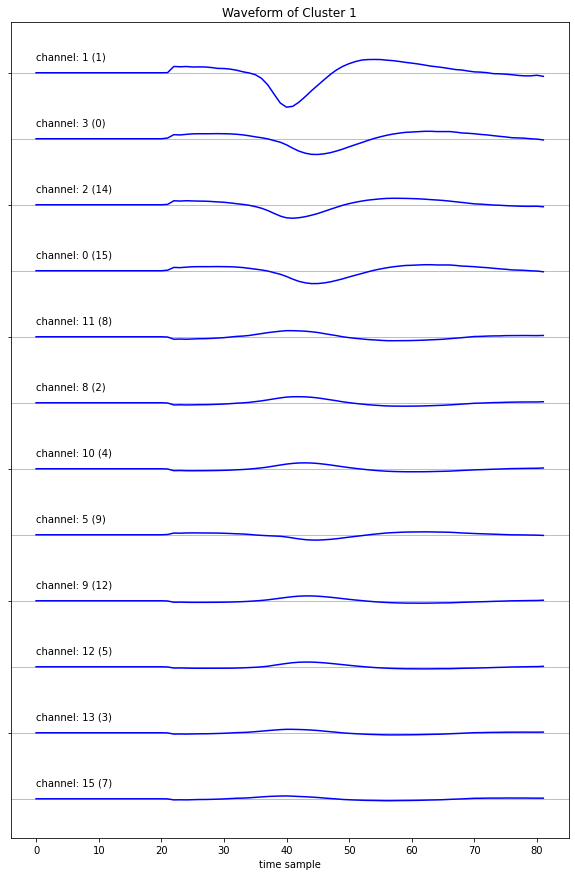

In [11]:
# plot on selected channels

plt.figure(figsize=(10,15))

for i,channel in enumerate(channels):
    
    channel_mapped, waveform = ses.get_waveform(cluster, channel)
    
    plt.axhline( y = -i*.5 , color="grey" , lw=.5 )
    label = "channel: "+str(channel)+" ("+str(channel_mapped)+")"
    plt.plot( waveform -i*.5 , label=label , color="blue")
    plt.text( s= label , x=0, y=-i*.5 +.1 )
plt.xlabel("time sample")
#plt.legend()
ax = plt.gca()
ax.set(yticklabels=[])  
plt.title("Waveform of Cluster "+str(cluster))
plt.show()

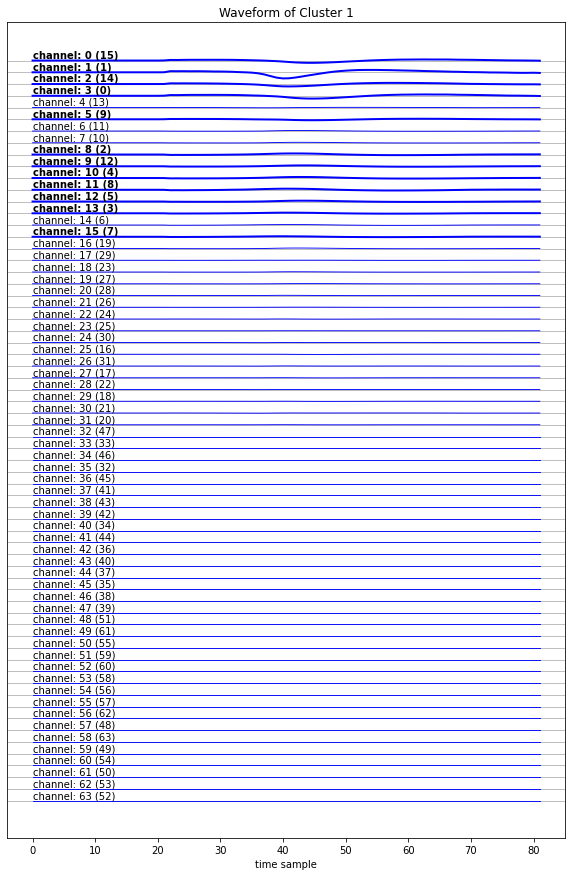

In [12]:
# plot all channels

channels_all = range(ses.wv_channels)

plt.figure(figsize=(10,15))

for i,channel in enumerate(channels_all):
    channel_mapped, waveform = ses.get_waveform(cluster, channel)
    
    plot_style = [2.,'bold'] if channel in channels else [.9, 'normal']
    
    plt.axhline( y = -i*.5 , color="grey" , lw=.5 )
    label = "channel: "+str(channel)+" ("+str(channel_mapped)+")"
    plt.plot( waveform -i*.5 , label=label , color="blue" , lw=plot_style[0])
    plt.text( s= label , x=0, y=-i*.5 +.1 , weight=plot_style[1])
plt.xlabel("time sample")
#plt.legend()
ax = plt.gca()
ax.set(yticklabels=[])  # remove the tick labels
ax.set(ylabel=None)  # remove the y-axis label
ax.tick_params(left=False)  # remove the ticks

plt.title("Waveform of Cluster "+str(cluster))
plt.show()

## Channel configuration (position and shank mapping)

In [13]:
print("electrodes:", ses.desel)

electrodes: ['adn', 'adn', 'adn', 'adn', 'mec', 'mec', 'mec', 'mec']


channel: 0  ( 15 ), position: [ 1. 65.]
channel: 1  ( 1 ), position: [ 1. 64.]
channel: 2  ( 14 ), position: [ 1. 63.]
channel: 3  ( 0 ), position: [ 1. 62.]
channel: 4  ( 13 ), position: [ 1. 61.]
channel: 5  ( 9 ), position: [ 1. 60.]
channel: 6  ( 11 ), position: [ 1. 59.]
channel: 7  ( 10 ), position: [ 1. 58.]
channel: 8  ( 2 ), position: [ 2. 57.]
channel: 9  ( 12 ), position: [ 2. 56.]
channel: 10  ( 4 ), position: [ 2. 55.]
channel: 11  ( 8 ), position: [ 2. 54.]
channel: 12  ( 5 ), position: [ 2. 53.]
channel: 13  ( 3 ), position: [ 2. 52.]
channel: 14  ( 6 ), position: [ 2. 51.]
channel: 15  ( 7 ), position: [ 2. 50.]
channel: 16  ( 19 ), position: [ 3. 49.]
channel: 17  ( 29 ), position: [ 3. 48.]
channel: 18  ( 23 ), position: [ 3. 47.]
channel: 19  ( 27 ), position: [ 3. 46.]
channel: 20  ( 28 ), position: [ 3. 45.]
channel: 21  ( 26 ), position: [ 3. 44.]
channel: 22  ( 24 ), position: [ 3. 43.]
channel: 23  ( 25 ), position: [ 3. 42.]
channel: 24  ( 30 ), position: [ 4. 

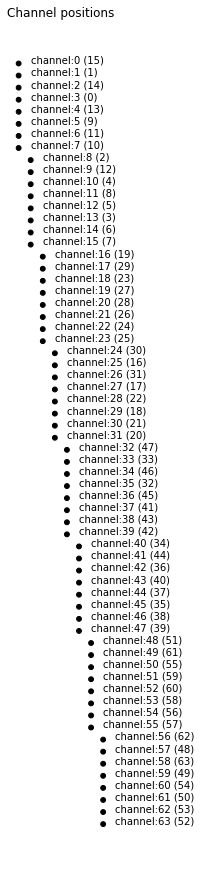

In [14]:
fig, ax = plt.subplots(figsize=(9,12), constrained_layout=True)

for channel, position in zip(range(ses.wv_channels), ses.channel_positions):
    print("channel:",channel," (",ses.channel_map[channel],"), position:",position)
        
    circle = plt.Circle((position[0], position[1]), 0.2, color="black")
    ax.add_patch(circle)
    
    plt.text(x=position[0]+1, y=position[1], s="channel:"+str(channel)+" ("+str(ses.channel_map[channel])+")")
    

ax.axis('off')
ax.axis('scaled') #this line fits your images to screen 
#ax.autoscale(enable=True)
plt.title("Channel positions")
#plt.tight_layout()
plt.show()

draw this for the specific cluster showing the significant channels

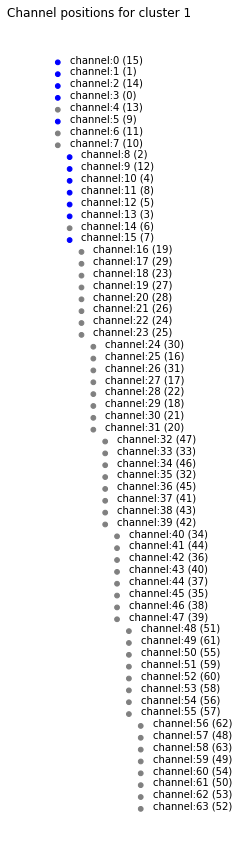

In [15]:
fig, ax = plt.subplots(figsize=(9,12))

for channel, position in zip(range(ses.wv_channels), ses.channel_positions):        
    color = 'blue' if channel in channels else 'gray'
    
    circle = plt.Circle((position[0], position[1]), 0.2, color=color)
    ax.add_patch(circle)
    
    plt.text(x=position[0]+1, y=position[1], s="channel:"+str(channel)+" ("+str(ses.channel_map[channel])+")")
    
ax.axis('off')
ax.axis('scaled') #this line fits your images to screen 
#ax.autoscale(enable=True) 
plt.title("Channel positions for cluster "+str(cluster))
plt.tight_layout()
plt.show()

Reduce this to shanks (multiple channels are on one shank), and multiple shanks are in one brain region.
One neuron shall be unambigously defined on only one brain region. 

In [16]:
print("Shanks:", ses.shanks_all)

Shanks: [1. 2. 3. 4. 5. 6. 7. 8.]


In [17]:
shanks_arr, active_shanks, electrodes = ses.get_active_shanks(channels)

In [18]:
if len(electrodes)!=1:
    print("Error, neuron was active on channels that belong to different brain regions!")

shank 1 (adn) is active
shank 2 (adn) is active
shank 3 (adn) is not detecting this neuron
shank 4 (adn) is not detecting this neuron
shank 5 (mec) is not detecting this neuron
shank 6 (mec) is not detecting this neuron
shank 7 (mec) is not detecting this neuron
shank 8 (mec) is not detecting this neuron


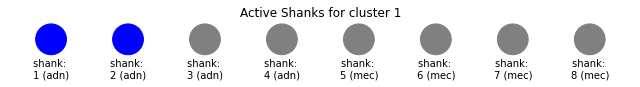

Brain region for neuron 1 is adn


In [19]:
fig, ax = plt.subplots(figsize=(9,3))

for i, (shank, active, el) in enumerate(zip(ses.shanks_all, shanks_arr, ses.desel)):
    print("shank",str(int(shank)),"("+el+")","is","active" if active else "not detecting this neuron")
    
    color = 'blue' if active else 'gray'
    
    circle = plt.Circle((i,0), 0.2, color=color)
    ax.add_patch(circle)
    
    plt.text(x=i, y=-.5, s="shank: \n"+str(int(shank))+" ("+el+")", ha='center')

ax.axis('off')
ax.axis('scaled') #this line fits your images to screen 
ax.autoscale(enable=True) 
plt.title("Active Shanks for cluster "+str(cluster))
plt.tight_layout()
plt.show()

print("Brain region for neuron",cluster,"is",electrodes[0])

## Create a pose file 

In [20]:
ap = Animal_pose(ses)
if not os.path.exists(f"{ses.fileBase}.pose.npy"):
    print("load from positrack")
    ap.pose_from_positrack_files(ses=ses, interpolation_frequency_hz = 50, extension="positrack")
    ap.save_pose_to_file() # save the file for next time
else:
    print("load from saved pose file")
    ap.load_pose_from_file()

load from saved pose file


In [21]:
ap.invalid_ratio()

0.04353861827300919

In [22]:
# debug pose loading
# ap.pose_from_positrack_files(ses=ses, interpolation_frequency_hz = 50, extension="positrack")

# interval = only within positrack! , not entire dat-file. check first and last ttl pulse
# sync posi=dat, missing pulses?
##ap.ttl_ups[0].shape
#ap.ttl_ups

In [23]:
# find good shape automagically
diameter=70.
xyrange_min,xyrange_max=ap.find_xy_range(diameter=diameter)  ###-> do this within intervals , for each trial + use min/max to find best square that covers most of the area
xmean,ymean = ap.meanloc
print("xmean,ymean",xmean,ymean)
print("xyrange_min,xyrange_max",xyrange_min,xyrange_max)

xmean,ymean 48.93692378694904 58.42739633010676
xyrange_min,xyrange_max [13.93692379 23.42739633] [83.93692379 93.42739633]


Plot the path of the animal to see if it was loaded correctly.

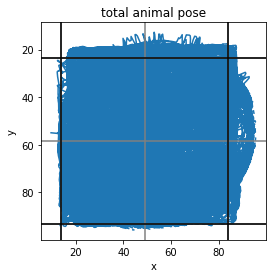

In [24]:
plt.plot(ap.pose[:,1],ap.pose[:,2])
plt.xlabel("x")
plt.ylabel("y")
#plt.scatter([xmean],[ymean], color="black", s=20)
plt.axvline(x=xmean, color="gray")
plt.axhline(y=ymean, color="gray")
plt.axvline(x=xmean+diameter/2, color="gray")
plt.axhline(y=ymean+diameter/2, color="gray")
plt.axvline(x=xmean-diameter/2, color="gray")
plt.axhline(y=ymean-diameter/2, color="gray")

plt.axvline(x=xyrange_min[0], color="black")
plt.axvline(x=xyrange_max[0], color="black")
plt.axhline(y=xyrange_min[1], color="black")
plt.axhline(y=xyrange_max[1], color="black")

plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("total animal pose")
plt.show()

tests to detect outliers (preliminary)

In [25]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

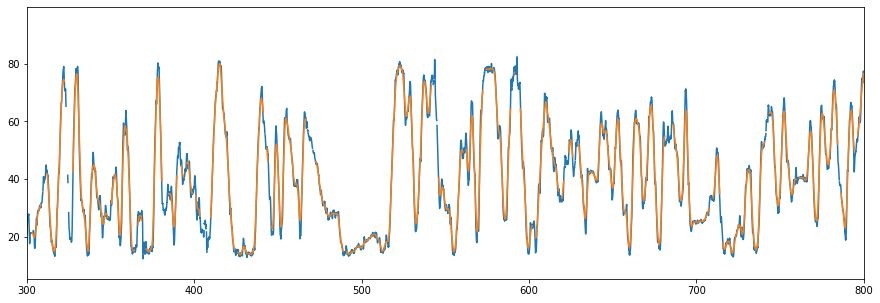

In [26]:
t = ap.pose[:,0]
x = ap.pose[:,1]
x_s = smooth(x,100)
plt.figure(figsize=(15,5))
plt.plot(t, x)
plt.plot(t, x_s) 
plt.xlim((300,800))
plt.show()

In [27]:
w = ((np.abs(x_s - x)>5) & (~np.isnan(x)))

In [28]:
w.sum()

5513

In [29]:
t_w = t[w]

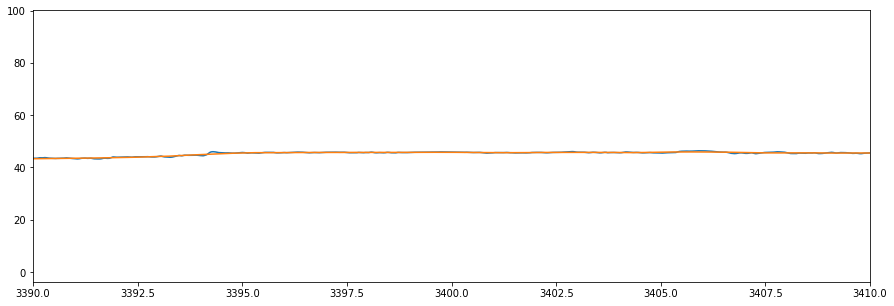

In [30]:
t = ap.pose[:,0]
x = ap.pose[:,1]
x_s = smooth(x,100)
plt.figure(figsize=(15,5))
plt.plot(t, x)
plt.plot(t, x_s) 
plt.scatter(t_w, np.ones_like(t_w))
plt.xlim((3390,3410))
plt.show()

In [31]:
len(x)

446615

In [32]:
ap.speed_from_pose()

In [33]:
ap.pose.shape

(446615, 7)

In [34]:
ap.speed.shape

(446615,)

In [35]:
ap.distance.shape

(446615,)

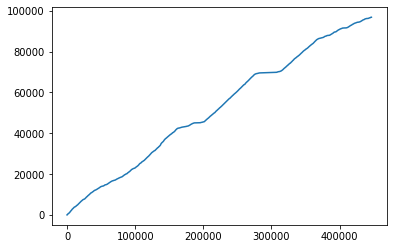

In [36]:
plt.plot(ap.distance)
#plt.plot(ap.speed)

Plot the occupancy map to see where the animal spent more or less time.

(The image seems mirrored since the x/y-axis for imshow is different compared to the plot function.)

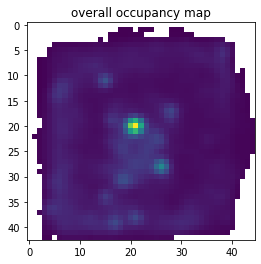

In [37]:
ap.occupancy_map_2d()
plt.imshow(ap.occupancy_map.T)
plt.title("overall occupancy map")
plt.show()

Plot the head-direction of the animal and its position a short segment.

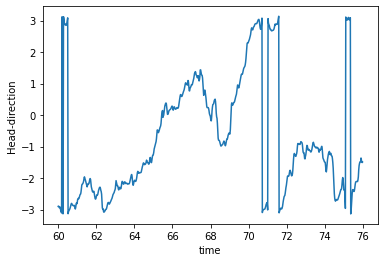

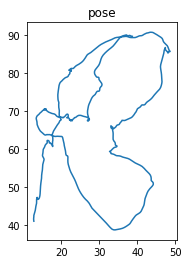

In [38]:
s=3000
e=3800

plt.plot(ap.pose[s:e,0], ap.pose[s:e,4])
plt.xlabel("time")
plt.ylabel("Head-direction")
plt.show()

plt.plot(ap.pose[s:e,1],ap.pose[s:e,2])
plt.gca().set_aspect('equal', adjustable='box')
plt.title("pose")
plt.show()

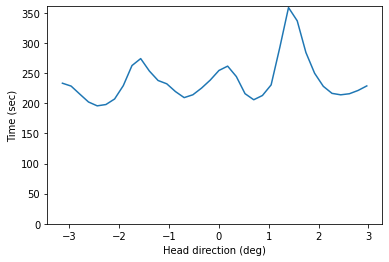

In [39]:
ap.head_direction_occupancy_histogram()
plt.plot(ap.hd_occupancy_bins[:-1],ap.hd_occupancy_histogram)
plt.ylim(0,np.max(ap.hd_occupancy_histogram)+2)
plt.ylabel("Time (sec)")
plt.xlabel("Head direction (deg)")
plt.show()

## **Summary:** Analysis for Trials

Now that we have all data from neurons and animal pose, set them together for further analysis.

Use only the `cg` or `n.spatial_properties` from now on.

In [40]:
print("number of trials:", ses.n_trials)
trials_in_environment = [ i for i,en in enumerate(ses.desen) if not en.startswith("rb") ]
trials_in_environment_number = len(trials_in_environment)
print("without restbox:", trials_in_environment_number)

number of trials: 9
without restbox: 5


Now we need to set the SpatialProperties object of each Neuron objects of the CellGroup.
Then we can get information score for each neuron from a firing rate map without smoothing.
We recalculate the maps with smoothing for display purposes.

In [41]:
cg.set_spatial_properties(ap)

Show a summary of all trials in that session with lots of information (skip restbox)

In [42]:
import matplotlib.patches as patches

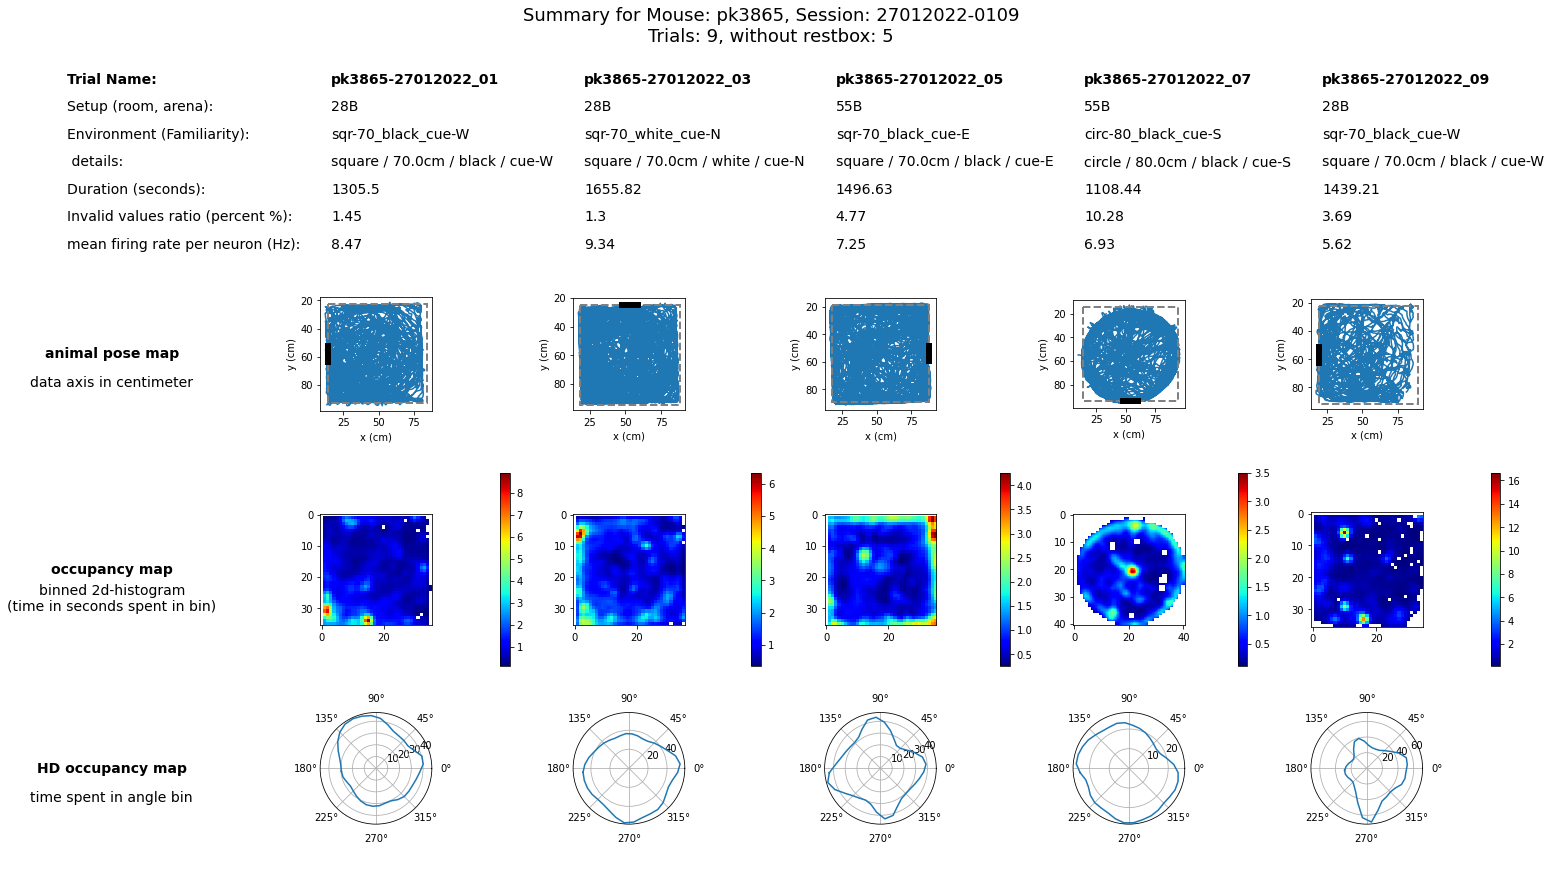

In [43]:
rows = 4
cols = trials_in_environment_number+1

fig, ax = plt.subplots(nrows=rows, ncols=cols, constrained_layout=True, figsize=(3.5*cols,3*rows))

plt.suptitle("Summary for Mouse: "+subject+", Session: "+session + "\n" +"Trials: "+str(ses.n_trials)+", without restbox: "+str(trials_in_environment_number) ,fontsize=18)
#plt.title()

# use this subplot only as grid for text
#ax[0,0].set_title("summary")
ax[0,0].axis("off")
ax[0,0].set_xlim([0, 10])
ax[0,0].set_ylim([0, 7])
ax[0,0].invert_yaxis()

ax[0,0].text(1.0,1.0, "Trial Name:", weight="bold", fontsize=14, verticalalignment="center")
for y,txt in enumerate(["Setup (room, arena)", "Environment (Familiarity)", " details", "Duration (seconds)", "Invalid values ratio (percent %)", "mean firing rate per neuron (Hz)"]):
    ax[0,0].text(1.0, 2+y, txt+":", fontsize=14, verticalalignment="center")

rows_description = [ ["animal pose map","data axis in centimeter"] , ["occupancy map", "binned 2d-histogram\n(time in seconds spent in bin)"], ["HD occupancy map", "time spent in angle bin"] ] 
for r,label in zip(np.arange(1,rows) , rows_description):
    #ax[r,0].set_title("occupancy map")
    ax[r,0].axis("off")
    ax[r,0].set_xlim([-1, 1])
    ax[r,0].set_ylim([-1, 1])
    ax[r,0].invert_yaxis()
    ax[r,0].text(0,0, label[0], weight="bold", fontsize=14, horizontalalignment="center", verticalalignment="center")
    ax[r,0].text(0,0.3, label[1], fontsize=14, horizontalalignment="center", verticalalignment="center")


i=1
for t,(tn,su,en,(shape,diam,color,cue),ef,iv) in enumerate(ses.session_trials()):
    # skip restbox
    if not t in trials_in_environment:
        continue
        
    # first row = desciption
    # use this subplot only as grid for text
    #ax[0,i].set_title(tn)
    ax[0,i].axis("off")
    ax[0,i].set_xlim([0, 10])
    ax[0,i].set_ylim([0, 7])
    ax[0,i].invert_yaxis()
    #ax[0,i].scatter([1],[1])
    

    ## restrict to trial = set appropriate interval
    ap.set_intervals(iv)
    cg.set_spatial_properties(ap) # apply these to all neurons
    # print(cg.mean_firing_rate_per_neuron()) # this can be now calculated for the specific trial
    # print(cg.neuron_list[0].spike_train.st)
    
    ax[0,i].text(1.0,1.0, tn, weight="bold", fontsize=14, verticalalignment="center")
    for y,txt in enumerate([su, en, ' / '.join([shape,str(diam)+'cm',str(color),str(cue)]), np.round(iv[1]-iv[0],2) , np.round(100.*ap.invalid_ratio(),2) , np.round(cg.mean_firing_rate_per_neuron(),2) ]):
        ax[0,i].text(1.0, 2+y, txt, fontsize=14, verticalalignment="center")
    
    
    ## draw animal's pose, and automagically detected square
    ax[1,i].plot(ap.pose[:,1],ap.pose[:,2])
    
    ax[1,i].set_aspect('equal', adjustable='box')
    #ax[1,i].axis('scaled')
    #ax[1,i].autoscale()
    
    xyrange_min,xyrange_max = ap.find_xy_range(diameter = diam)
    # print("meanloc",ap.meanloc)
    # print("poserect",ap.poserect)

    # draw the Rectangle (pose xy_range), and add it as patch to the Axes
    rect = patches.Rectangle((xyrange_min[0], xyrange_min[1]), diam, diam, linewidth=2, edgecolor='gray', ls="dashed", fill=False, facecolor='none', zorder=4)
    ax[1,i].add_patch(rect)
    
    # draw the cue card
    cue = cue.split('-')
    if len(cue)>1:
        cue = cue[1]
    else:
        cue = cue[0]
    
    cuelen = diam/5.
    cuewidth = 3.
    
    cardinal_direction = {
        'N':((xyrange_min[0]+diam/2.-cuelen/2., xyrange_min[1]-cuewidth/2.) , cuelen, cuewidth),
        'S':((xyrange_min[0]+diam/2.-cuelen/2., xyrange_max[1]-cuewidth/2.) , cuelen, cuewidth),
        'W':((xyrange_min[0]-cuewidth/2., xyrange_min[1]+diam/2.-cuelen/2.) , cuewidth, cuelen),
        'E':((xyrange_max[0]-cuewidth/2., xyrange_min[1]+diam/2.-cuelen/2.) , cuewidth, cuelen)
    }
    cue_coords = cardinal_direction.get(cue, False)
    if cue_coords:
        (x0,y0),width,height = cue_coords
        rect = patches.Rectangle((x0,y0), width, height, linewidth=2, edgecolor='black', facecolor='black', fill=True, zorder=5)
        ax[1,i].add_patch(rect)
    
    # y is increasing south, like in imshow
    ax[1,i].invert_yaxis()
    
    #ax[1,i].axis('off')
    ax[1,i].set_xlabel("x (cm)")
    ax[1,i].set_ylabel("y (cm)")
    
    
    ## occupancy map
    ap.invalid_outside_spatial_area(shape=shape, radius=diam/2., length=diam, center=np.mean([xyrange_min,xyrange_max],axis=0))
    ap.occupancy_map_2d() 
    im = ax[2,i].imshow(ap.occupancy_map.T, cmap='jet')#, origin="lower")
    #ax[2,i].plot([1,2,3],[5,5,7])
    c = fig.colorbar(im,ax=ax[2,i], pad=-0.3)
    #im.set_clim(0, 0.5)
    #maxocc=[None]*trials_in_environment_number , collect to normalize all together with same colorbar
    # print(np.nanmax(ap.occupancy_map))
    
    ## HD occupancy map
    ap.head_direction_occupancy_histogram()  # calculate HD occ map
    angles = ap.mid_point_from_edges(ap.hd_occupancy_bins) # get mid angles from histogram edges
    #ax[3,i].set_ylim(0,np.max(ap.hd_occupancy_histogram)*1.2)
    # make polar plot (radius = time spent in that HD bin)
    ax[3,i].axis('off')
    ax2 = fig.add_subplot(rows, cols, cols*3+i+1, polar=True)
    #ax2.plot(angles, ap.hd_occupancy_histogram)
    ax2.plot(np.append(angles,angles[0]), np.append(ap.hd_occupancy_histogram,ap.hd_occupancy_histogram[0]))
    ax2.grid(True)
    
    i+=1
    
#plt.subplots_adjust(wspace=0.1, hspace=0.3, top=.85)
#fig.set_constrained_layout_pads(w_pad=4./72., h_pad=4./72., hspace=0./72., wspace=0./72.)

#plt.savefig('/home/pascal/Documents/science_docs/analysis_results/'+name+'_summary.pdf')
plt.show()

## For each Trial, individual analysis

hd_mean_direction_rad, hd_mean_direction_deg, hd_mean_vector_length -2.9891584359815178 -171.26616267766704 0.06312695619566264


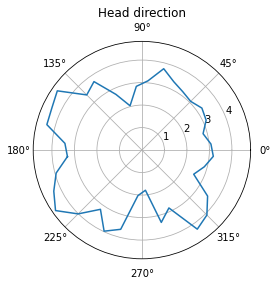

In [44]:
## demo execution for one neuron

# polar plot
n = cg.neuron_list[1]
n.set_spatial_properties(ap)
n.spatial_properties.firing_rate_head_direction_histogram(smoothing=False)

angles = n.spatial_properties.mid_point_from_edges(n.spatial_properties.firing_rate_head_direction_histo_edges)
hd_firing = n.spatial_properties.firing_rate_head_direction_histo

hd_mean_direction_rad, hd_mean_direction_deg, hd_mean_vector_length, hd_peak_angle_rad, hd_peak_rate = n.spatial_properties.head_direction_score()

#print("angles:",len(angles),angles)
#print("hd_firing:",len(data),data)

print("hd_mean_direction_rad, hd_mean_direction_deg, hd_mean_vector_length",hd_mean_direction_rad, hd_mean_direction_deg, hd_mean_vector_length)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
#ax.plot(angles, data)
ax.plot(np.append(angles,angles[0]), np.append(hd_firing,hd_firing[0]))
ax.grid(True)
#ax.axvline(hd_mean_direction_rad, hd_mean_vector_length, color="black")
ax.set_title("Head direction")
plt.show()

compare between trials

In [45]:
break

for i,(tn,iv,en) in enumerate(zip(ses.trial_names, ses.trial_intervals.inter, ses.desen)):
    
    if en=="rb":
        continue
    
    print("Trial",i,"("+tn+")") 
    print("environment:",en)
    
    iv=np.array([iv])
    print("Interval:",iv)

    # reset and set intervals
    n.spike_train.unset_intervals()
    ap.unset_intervals()
    n.spike_train.set_intervals(iv)
    ap.set_intervals(iv)
    n.set_spatial_properties(ap)
    
    # occupancy map
    ap.occupancy_map_2d()
    plt.imshow(ap.occupancy_map)
    plt.title("occupancy map")
    plt.gca().set_aspect('equal', adjustable='box')
    #plt.gca().axis('equal')
    plt.show()
    print("occupancy map",type(ap.occupancy_map),ap.occupancy_map.shape)
    
    
    #xy_range = np.array([[0,0],[70,70]]) # [[xmin,ymin],[xmax,ymax]]
    xy_range = ap.invalid_outside_spatial_area(shape = "square", length=70)
    print("xy_range",xy_range)
    ap.occupancy_map_2d(xy_range=xy_range)
    plt.imshow(ap.occupancy_map)
    plt.title("occupancy map")
    plt.gca().set_aspect('equal', adjustable='box')
    #plt.gca().axis('equal')
    plt.show()
    print("occupancy map",type(ap.occupancy_map),ap.occupancy_map.shape)
    
    # spatial firing map 
    #n.spatial_properties.firing_rate_map_2d(cm_per_bin =2, smoothing_sigma_cm = 2, smoothing=True)
    n.spatial_properties.firing_rate_map_2d(xy_range=xy_range)
    plt.imshow(n.spatial_properties.firing_rate_map,cmap='jet')
    plt.title("clu:{}, mRate:{:.3} Hz".format(n.name,n.spike_train.mean_firing_rate()))
    plt.show()
    print("firingrate map",type(n.spatial_properties.firing_rate_map),n.spatial_properties.firing_rate_map.shape)
   
    print("")


SyntaxError: 'break' outside loop (635425879.py, line 1)

In [ ]:
ses.n_trials

In [ ]:
ses.n_trials
trials_environments = [ en for en in ses.desen if not en=="rb" ]

In [ ]:
trials_environments

In [ ]:
n.spike_train.st

In [ ]:
name

In [ ]:
#squeeze=False
fig, axs = plt.subplots(len(cg.neuron_list), len(trials_environments), figsize=(20, 5*len(cg.neuron_list)), constrained_layout = True , squeeze=False)

for i, n in enumerate(cg.neuron_list):
    
    n.set_spatial_properties(ap)
    
    j=0
    
    for t,(tn,iv,en,su,ef) in enumerate(zip(ses.trial_names, ses.trial_intervals.inter, ses.desen, ses.setup, ses.environmentFamiliarity)):
        
        if en=="rb":
            continue

        iv=np.array([iv])

        # reset and set intervals        
        n.spike_train.unset_intervals()
        ap.unset_intervals()
        n.spike_train.set_intervals(iv)
        ap.set_intervals(iv)

        # spatial firing map
        #xy_range = n.spatial_properties.ap.invalid_outside_spatial_area(shape = "square", length=70)
        n.spatial_properties.firing_rate_map_2d(cm_per_bin =2, smoothing_sigma_cm = 2, smoothing=True)
        #n.spatial_properties.firing_rate_map_2d(xy_range = xy_range)


        
        axs[i,j].imshow(n.spatial_properties.firing_rate_map,cmap='jet')
        gs=n.spatial_properties.grid_score()
        
        fw='bold' if gs>.4 else 'normal'
            
        axs[i,j].set_title("clu:{}, mRate:{:.3} Hz\ngrid score:{:.3}".format(n.name,n.spike_train.mean_firing_rate(),gs) + "\n" + "Trial "+str(t+1)+" ("+tn+")"+"\n"+"setup: "+su+"\n"+"environment: "+en+"\n"+"familiarity: "+ef, fontweight=fw)
        axs[i,j].set_aspect('equal', adjustable='box')
        j+=1
        
    # testing
    #if i>2:
    #    break

#plt.tight_layout()
#fig.subplots_adjust(wspace=0.1, hspace=0.85)
#plt.savefig(prefixdir+'/home/pascal/Documents/science_docs/analysis_results/'+name+'_trials.pdf')
plt.show()


In [ ]:
fig, axs = plt.subplots(len(cg.neuron_list), len(trials_environments), figsize=(20, 5*len(cg.neuron_list)), constrained_layout = True)

for i, n in enumerate(cg.neuron_list):
    
    n.set_spatial_properties(ap)
    
    j=0
    
    for t,(tn,iv,en,su,ef) in enumerate(zip(ses.trial_names, ses.trial_intervals.inter, ses.desen, ses.setup, ses.environmentFamiliarity)):
        
        if en=="rb":
            continue

        iv=np.array([iv])

        # reset and set intervals        
        n.spike_train.unset_intervals()
        ap.unset_intervals()
        n.spike_train.set_intervals(iv)
        ap.set_intervals(iv)

        
        
        # Head direction

        n.spatial_properties.firing_rate_head_direction_histogram(smoothing=False)

        angles = n.spatial_properties.mid_point_from_edges(n.spatial_properties.firing_rate_head_direction_histo_edges)
        hd_firing = n.spatial_properties.firing_rate_head_direction_histo
        hd_mean_direction_rad, hd_mean_direction_deg, hd_mean_vector_length, hd_peak_angle_rad, hd_peak_rate = n.spatial_properties.head_direction_score()

        axs[i,j].plot(angles, hd_firing)
        axs[i,j].set_xlabel("Head direction")
        axs[i,j].set_ylabel("Firing rate (Hz)")
        axs[i,j].set_ylim(0,np.max(n.spatial_properties.firing_rate_head_direction_histo)*1.2)
        axs[i,j].axvline(x=hd_mean_direction_rad, color="black")
        axs[i,j].axvline(x=hd_peak_angle_rad, color="black", ls="dashed")
        #axs[i,4].text(s=str(round(hd_mean_direction_rad*180./np.pi))+" ° (vector length = "+str(hd_mean_vector_length)+")",x=hd_mean+.1,y=1)
        
        
        fw='bold' if (hd_mean_vector_length>.4 and hd_peak_rate>3) else 'normal' # check for vector len AND peak rate
            
        #axs[i,j].set_title("clu:{}, mRate:{:.3} Hz\ngrid score:{:.3}".format(n.name,n.spike_train.mean_firing_rate(),gs) + "\n" + "Trial "+str(t+1)+" ("+tn+")"+"\n"+"setup: "+su+"\n"+"environment: "+en+"\n"+"familiarity: "+ef, fontweight=fw)
        #axs[i,j].set_aspect('equal', adjustable='box')
        if (np.isfinite(hd_mean_direction_deg) and np.isfinite(hd_mean_vector_length)):
            axs[i,j].set_title("neuron "+n.name+"\n"+"Head direction" + "\n" + "mean direction: " + str(round( (hd_mean_direction_deg + 360) % 360  )) +"°" + "\n" + "mean vector length: " + str(np.round(hd_mean_vector_length,2))  , fontweight=fw)
        else:
            axs[i,j].set_title("?")
        j+=1
        
    # testing
    #if i>2:
    #    break

#plt.tight_layout()
#fig.subplots_adjust(wspace=0.1, hspace=0.85)
#plt.savefig(prefixdir+'/home/pascal/Documents/science_docs/analysis_results/'+name+'_trials_hd.pdf')
plt.show()


In [ ]:
# grid cells: .any / .all - axis=0, per trial (cells must show grid pattern in all trials!),   same for classify HD cells

In [ ]:
# map correlation - grid score

print("map correlation")

maps_correlation = [] # collect correlation of maps

for i, n in enumerate(cg.neuron_list):
    
    print("=====================")
    print(i,n.name)
    print("")
    
    n.set_spatial_properties(ap)    
    maps=[] # maps to compare with
    
    for t,(tn,iv,en) in enumerate(zip(ses.trial_names, ses.trial_intervals.inter, ses.desen)):

        if en=="rb":
            continue
            
        print("Trial",t+1,"("+tn+")")
        print("environment:",en)
        iv=np.array([iv])
        print("Interval:",iv)
        
        # reset and set intervals
        n.spike_train.unset_intervals()
        ap.unset_intervals()
        n.spike_train.set_intervals(iv)
        ap.set_intervals(iv)
        
        xy_range = n.spatial_properties.ap.invalid_outside_spatial_area(shape = "square", length=70)
        print("xy_range",xy_range)
        #n.spatial_properties.firing_rate_map_2d(cm_per_bin =2, smoothing_sigma_cm = 2, smoothing=True)
        n.spatial_properties.firing_rate_map_2d(xy_range = xy_range)
        
        firing_rate_map = n.spatial_properties.firing_rate_map
        
        if t==0:
            map1 = firing_rate_map
        else:
            maps.append(firing_rate_map)
        
        print("")
        
    
    print("---")
    
    mcorr=[] # for this neuron
    
    for map2 in maps:
        print("map1",map1.shape)
        plt.imshow(map1)
        plt.title("map1")
        plt.show()
        print("map2",map2.shape)
        plt.imshow(map2)
        plt.title("map2")
        plt.show()
        p = n.spatial_properties.map_crosscorrelation(map1=map1, map2=map2)
        print("p=",p)
        mcorr.append(p)
        
    maps_correlation.append(mcorr)
        
    print("===")
        
    #testing
    if i>2:
        break

In [ ]:
maps_correlation = np.array(maps_correlation)
print(maps_correlation.shape)

In [ ]:
maps_correlation

In [ ]:
plt.boxplot(maps_correlation)
plt.xticks([1, 2], ['black-white', 'black-black'])
plt.show()

Loop for our neurons and do the analysis we need to know if we have spatially selective neurons or head-direction cells

In [ ]:
ses.trial_intervals.inter

In [ ]:
hd_firing_list=[] # neurons tuning curve
hd_ifr_list=[] # ifr list
spike_trains = [] # spike trains


# from matplotlib.patches import Rectangle

cols = 8

fig, axs = plt.subplots(len(cg.neuron_list), cols, figsize=(25, 5*len(cg.neuron_list)))
   
for i, n in enumerate(cg.neuron_list):
    
    # first interval
    iv = ses.trial_intervals.inter[0]
    iv = np.array([iv])

    # reset and set intervals
    n.spike_train.unset_intervals()
    ap.unset_intervals()
    n.spike_train.set_intervals(iv)
    ap.set_intervals(iv)
    
    
    
    # temporal auto-correlation
      
    n.spike_train.spike_time_autocorrelation(bin_size_sec=0.0005,min_sec=-0.05, max_sec=0.05)
    timestamp = n.spike_train.mid_point_from_edges(n.spike_train.st_autocorrelation_histogram[1])
    axs[i,0].plot(timestamp, n.spike_train.st_autocorrelation_histogram[0])
    
    n.spike_train.spike_time_autocorrelation(bin_size_sec=0.0025,min_sec=-0.5, max_sec=0.5)
    timestamp = n.spike_train.mid_point_from_edges(n.spike_train.st_autocorrelation_histogram[1])
    axs[i,1].plot(timestamp, n.spike_train.st_autocorrelation_histogram[0])
    
    
    # clear intervals
    
    # n.spike_train.unset_intervals()
    # ap.unset_intervals()
    # n.spike_train.set_intervals(ses.trial_intervals.inter)
    # ap.set_intervals(ses.trial_intervals.inter)
    
    # spatial firing map 
    
    n.set_spatial_properties(ap)
    n.spatial_properties.firing_rate_map_2d(cm_per_bin =2, smoothing_sigma_cm = 2, smoothing=True)
    im = axs[i,2].imshow(n.spatial_properties.firing_rate_map,cmap='jet')
    axs[i,2].set_title("clu:{}, mRate:{:.3} Hz".format(n.name,n.spike_train.mean_firing_rate()))
    fig.colorbar(im,ax=axs[i,2])
    
    
    # Spatial autocorrelation Map & Grid Score
    gs = n.spatial_properties.grid_score()
    
    fw = "bold" if gs>.4 else "normal"
    
    axs[i,3].imshow(n.spatial_properties.spatial_autocorrelation_map)
    axs[i,3].set_title("spatial autocorrelation"+"\n"+"Grid Score: "+str(round(gs,2)), fontweight=fw)
    
    # Head direction
    
    n.spatial_properties.firing_rate_head_direction_histogram(smoothing=False)
    
    angles = n.spatial_properties.mid_point_from_edges(n.spatial_properties.firing_rate_head_direction_histo_edges)
    hd_firing = n.spatial_properties.firing_rate_head_direction_histo
    hd_mean_direction_rad, hd_mean_direction_deg, hd_mean_vector_length, hd_peak_angle_rad, hd_peak_rate = n.spatial_properties.head_direction_score()
    
    axs[i,4].plot(angles, hd_firing)
    axs[i,4].set_xlabel("Head direction")
    axs[i,4].set_ylabel("Firing rate (Hz)")
    axs[i,4].set_ylim(0,np.max(n.spatial_properties.firing_rate_head_direction_histo)*1.2)
    axs[i,4].axvline(x=hd_mean_direction_rad, color="black")
    #axs[i,4].text(s=str(round(hd_mean_direction_rad*180./np.pi))+" ° (vector length = "+str(hd_mean_vector_length)+")",x=hd_mean+.1,y=1)
    
    fw = "bold" if hd_mean_vector_length>.4 else "normal"
    axs[i,5].axis('off')
    ax2 = fig.add_subplot(len(cg.neuron_list), cols, cols*i+6, polar=True)
    #ax2.plot(angles, hd_firing)
    ax2.plot(np.append(angles,angles[0]), np.append(hd_firing,hd_firing[0]))
    ax2.plot([hd_mean_direction_rad]*2, [0,max(hd_firing)] , color="blue", alpha=hd_mean_vector_length, lw=2.5  )
    ax2.set_title("Head direction" + "\n" + "mean direction: " + str(round( (hd_mean_direction_deg + 360) % 360  )) +"°" + "\n" + "mean vector length: " + str(np.round(hd_mean_vector_length,2))  , fontweight=fw) 
    ax2.grid(True)
    
    
    # Wavefroms
    
    cluster = int(n.name) # current cluster name
    channels = ses.get_channels_from_cluster(cluster) # get channels with highest amplitude
    
    if (len(channels)):
    
        for j,channel in enumerate(channels):
            channel_mapped, waveform = ses.get_waveform(cluster, channel)
            axs[i,6].axhline( y = -j*.5 , color="grey" , lw=.5 )
            #label = "channel: "+str(channel)+" ("+str(channel_mapped)+")"
            label = "channel "+str(channel_mapped)
            axs[i,6].plot( waveform -j*.5 , label=label , color="blue")
            axs[i,6].text( s= label , x=0, y=-j*.5 +.1 )
        axs[i,6].set_xlabel("time sample")
        axs[i,6].set(yticklabels=[])  
        axs[i,6].set_title("Waveform of Cluster "+str(cluster))
        
    # shanks
    shanks_arr, active_shanks, electrodes = ses.get_active_shanks(channels)
   
    for j, (shank, active) in enumerate(zip(ses.shanks_all, shanks_arr)):
        color = 'blue' if active else 'gray'
        circle = plt.Circle((j,0), 0.2, color=color)
        axs[i,7].add_patch(circle)

    
    axs[i,7].axis('off')
    axs[i,7].set_title("Active Shanks for cluster "+str(cluster)+"\n"+', '.join([str(int(active_shank)) for active_shank in active_shanks]))
    
    axs[i,7].set_xlim([-1, len(ses.shanks_all)])
    axs[i,7].set_ylim([-0.5, 0.5])
    
    ###########################
    # classify, find category: Grid cell, HD cell
    
    if (hd_mean_vector_length > 0.4):
        n.spike_train.instantaneous_firing_rate(bin_size_sec=2.e-2)
        print("n.name",n.name)
        print("n.spike_train.ifr",n.spike_train.ifr)
        print("n.spike_train.st",n.spike_train.st)
        
        hd_firing_list.append(hd_firing)
        hd_ifr_list.append(n.spike_train.ifr)
        spike_trains.append(n.spike_train.st)
        
        #rect = Rectangle((0.08, 1-(i+.5)/len(cg.neuron_list)), 0.85, 1/len(cg.neuron_list), facecolor='yellow', edgecolor='none', transform=fig.transFigure, zorder=-1)
        #fig.patches.append(rect)

    
    
#plt.tight_layout()
fig.subplots_adjust(wspace=0.33, hspace=.5)
#plt.savefig('/home/pascal/Documents/science_docs/analysis_results/'+name+'.pdf')
plt.show()


In [ ]:
angles = np.array(angles)
print("angles.shape",angles.shape)

hd_firing_list = np.array(hd_firing_list)
print("hd_firing_list.shape",hd_firing_list.shape)

hd_ifr_list = np.array(hd_ifr_list)
print("hd_ifr_list.shape",hd_ifr_list.shape)

spike_trains = np.array(spike_trains)
print("spike_trains.shape",spike_trains.shape)
'''
np.save("angles.npy",angles)
np.save("hd_firing_list.npy",hd_firing_list)
np.save("hd_ifr_list.npy",hd_ifr_list)
np.save("ap-pose.npy",ap.pose)
np.save("spike_trains.npy",spike_trains)
#'''
plt.plot(hd_ifr_list[0,2])
ap.pose[:,0].shape
hd_ifr_list[0,2,:].shape
ap.pose[:,0]
hd_ifr_list[0,2,:]